<a href="https://colab.research.google.com/github/DhatriPriya/DhatriPriya_INFO5731_Fall2021/blob/main/JAMIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mkaing all the requried imports
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [3]:
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('JAMIA.CSV')
data.head()

,title,author,refrence,volume,issue,date,pages,link,abstract,Clean Abstract
0,"Standards for Medical Identifiers, Codes, and ...",Board of Directors of the American Medical Inf...,Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 1–7,https://doi.org/10.1136/jamia.1994.95236133,A major obstacle to establishing a computer-st...,major obstacl establish comput store medic rec...
1,Medical Diagnostic Decision Support Systems—Pa...,"Randolph A. Miller, MD",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 8–27,https://doi.org/10.1136/jamia.1994.95236141,Articles about medical diagnostic decision sup...,articl medic diagnost decis support mdd system...
2,Designing Medical Informatics Research and Lib...,"William W. Stead, MD, R. Brian Haynes, MD, She...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 28–33,https://doi.org/10.1136/jamia.1994.95236134,Careful study of medical informatics research ...,care studi medic informat research librari res...
3,Knowledge-based Approaches to the Maintenance ...,"James J. Cimino, MD, Paul D. Clayton, PhD, Geo...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 35–50,https://doi.org/10.1136/jamia.1994.95236135,Objective: Develop a knowledge-based represent...,object develop knowledg base represent control...
4,A Performance and Failure Analysis of SAPHIRE ...,"William R. Hersh, MD, David H. Hickam, MD, MPH...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 51–60,https://doi.org/10.1136/jamia.1994.95236136,Objective: Assess the performance of the SAPHI...,object assess perform saphir autom inform retr...


In [4]:
#wE already have the cleaned d
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [5]:

for text in data["Clean Abstract"]:
  #tokens=word_tokenize(text)
  #pos=nltk.pos_tag(tokens)
  #newtext=(" ").join(val for val in tokens if val.lower() not in stopwords.words("english"))
  pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
  def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
data['POS tagged'] = data['Clean Abstract'].apply(str).apply(token_stop_pos)
data.head()

,title,author,refrence,volume,issue,date,pages,link,abstract,Clean Abstract,POS tagged
0,"Standards for Medical Identifiers, Codes, and ...",Board of Directors of the American Medical Inf...,Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 1–7,https://doi.org/10.1136/jamia.1994.95236133,A major obstacle to establishing a computer-st...,major obstacl establish comput store medic rec...,"[(major, a), (obstacl, None), (establish, v), ..."
1,Medical Diagnostic Decision Support Systems—Pa...,"Randolph A. Miller, MD",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 8–27,https://doi.org/10.1136/jamia.1994.95236141,Articles about medical diagnostic decision sup...,articl medic diagnost decis support mdd system...,"[(articl, n), (medic, v), (diagnost, r), (deci..."
2,Designing Medical Informatics Research and Lib...,"William W. Stead, MD, R. Brian Haynes, MD, She...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 28–33,https://doi.org/10.1136/jamia.1994.95236134,Careful study of medical informatics research ...,care studi medic informat research librari res...,"[(care, n), (studi, n), (medic, a), (informat,..."
3,Knowledge-based Approaches to the Maintenance ...,"James J. Cimino, MD, Paul D. Clayton, PhD, Geo...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 35–50,https://doi.org/10.1136/jamia.1994.95236135,Objective: Develop a knowledge-based represent...,object develop knowledg base represent control...,"[(object, a), (develop, v), (knowledg, a), (ba..."
4,A Performance and Failure Analysis of SAPHIRE ...,"William R. Hersh, MD, David H. Hickam, MD, MPH...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 51–60,https://doi.org/10.1136/jamia.1994.95236136,Objective: Assess the performance of the SAPHI...,object assess perform saphir autom inform retr...,"[(object, a), (assess, n), (perform, n), (saph..."


In [ ]:
data[["abstract", "Clean Abstract", "POS tagged"]]

,abstract,Clean Abstract,POS tagged
0,A major obstacle to establishing a computer-st...,major obstacl establish comput store medic rec...,"[(major, a), (obstacl, None), (establish, v), ..."
1,Articles about medical diagnostic decision sup...,articl medic diagnost decis support mdd system...,"[(articl, n), (medic, v), (diagnost, r), (deci..."
2,Careful study of medical informatics research ...,care studi medic informat research librari res...,"[(care, n), (studi, n), (medic, a), (informat,..."
3,Objective: Develop a knowledge-based represent...,object develop knowledg base represent control...,"[(object, a), (develop, v), (knowledg, a), (ba..."
4,Objective: Assess the performance of the SAPHI...,object assess perform saphir autom inform retr...,"[(object, a), (assess, n), (perform, n), (saph..."
...,...,...,...
3029,Clinical decision-making is based on knowledge...,clinic decis make base knowledg expertis autho...,"[(clinic, a), (decis, n), (make, v), (base, n)..."
3030,Precision medicine can revolutionize health ca...,precis medicin revolution health care tailor t...,"[(precis, n), (medicin, n), (revolution, n), (..."
3031,The Food & Drug Administration (FDA) is consid...,food drug administr fda consid perman exempt p...,"[(food, n), (drug, n), (administr, n), (fda, n..."
3032,NaN,NaN,"[(nan, n)]"


In [10]:
#Getting the steam words
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,title,author,refrence,volume,issue,date,pages,link,abstract,Clean Abstract,POS tagged,Lemma
0,"Standards for Medical Identifiers, Codes, and ...",Board of Directors of the American Medical Inf...,Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 1–7,https://doi.org/10.1136/jamia.1994.95236133,A major obstacle to establishing a computer-st...,major obstacl establish comput store medic rec...,"[(major, a), (obstacl, None), (establish, v), ...",major obstacl establish comput store medic r...
1,Medical Diagnostic Decision Support Systems—Pa...,"Randolph A. Miller, MD",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 8–27,https://doi.org/10.1136/jamia.1994.95236141,Articles about medical diagnostic decision sup...,articl medic diagnost decis support mdd system...,"[(articl, n), (medic, v), (diagnost, r), (deci...",articl medic diagnost decis support mdd syst...
2,Designing Medical Informatics Research and Lib...,"William W. Stead, MD, R. Brian Haynes, MD, She...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 28–33,https://doi.org/10.1136/jamia.1994.95236134,Careful study of medical informatics research ...,care studi medic informat research librari res...,"[(care, n), (studi, n), (medic, a), (informat,...",care studi medic informat research librari r...
3,Knowledge-based Approaches to the Maintenance ...,"James J. Cimino, MD, Paul D. Clayton, PhD, Geo...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 35–50,https://doi.org/10.1136/jamia.1994.95236135,Objective: Develop a knowledge-based represent...,object develop knowledg base represent control...,"[(object, a), (develop, v), (knowledg, a), (ba...",object develop knowledg base represent contr...
4,A Performance and Failure Analysis of SAPHIRE ...,"William R. Hersh, MD, David H. Hickam, MD, MPH...",Journal of the American Medical Informatics As...,Volume 1,Issue 1,January 1994,Pages 51–60,https://doi.org/10.1136/jamia.1994.95236136,Objective: Assess the performance of the SAPHI...,object assess perform saphir autom inform retr...,"[(object, a), (assess, n), (perform, n), (saph...",object ass perform saphir autom inform retri...


In [11]:
data[["Clean Abstract", "Lemma"]]

,Clean Abstract,Lemma
0,major obstacl establish comput store medic rec...,major obstacl establish comput store medic r...
1,articl medic diagnost decis support mdd system...,articl medic diagnost decis support mdd syst...
2,care studi medic informat research librari res...,care studi medic informat research librari r...
3,object develop knowledg base represent control...,object develop knowledg base represent contr...
4,object assess perform saphir autom inform retr...,object ass perform saphir autom inform retri...
...,...,...
3029,clinic decis make base knowledg expertis autho...,clinic decis make base knowledg expertis aut...
3030,precis medicin revolution health care tailor t...,precis medicin revolution health care tailor...
3031,food drug administr fda consid perman exempt p...,food drug administr fda consid perman exempt...
3032,NaN,nan


In [12]:
from textblob import TextBlob
def getPolarity(review):
  return TextBlob(review).sentiment.polarity
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
newd1=pd.DataFrame(data[["Clean Abstract", "Lemma"]])
newd1['Polarity'] = newd1['Lemma'].apply(getPolarity) 
newd1['Analysis'] = newd1['Polarity'].apply(analysis)
newd1.head()

,Clean Abstract,Lemma,Polarity,Analysis
0,major obstacl establish comput store medic rec...,major obstacl establish comput store medic r...,0.001042,Positive
1,articl medic diagnost decis support mdd system...,articl medic diagnost decis support mdd syst...,-0.018750,Negative
2,care studi medic informat research librari res...,care studi medic informat research librari r...,-0.088889,Negative
3,object develop knowledg base represent control...,object develop knowledg base represent contr...,-0.240000,Negative
4,object assess perform saphir autom inform retr...,object ass perform saphir autom inform retri...,-0.089630,Negative


In [13]:
Number_count= newd1.Analysis.value_counts()
print(Number_count)

Negative    1480
Positive    1022
Neutral      532
Name: Analysis, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


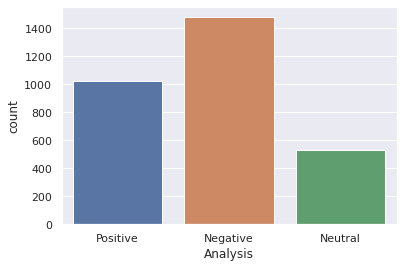

In [14]:
import numpy as np
import matplotlib.pyplot as plt
newd1.Analysis
pic=sns.countplot(x="Analysis",data=newd1)
print(pic)